In [58]:
import numpy as np

# np.random.seed(1)

def make_test_data(M, N, rcond):  # rcond = sigma_N / sigma_1
    assert M >= N

    A = np.random.randn(M, N)
    U, _, VT = np.linalg.svd(A)
    V = VT.T

    Sigma = np.logspace(np.log10(rcond), 0., N)

    A = (U[:, :N] * Sigma) @ VT

    b = np.random.randn(M)

    x = V * (1 / Sigma) @ U[:, :N].T @ b

    return A, b, x

M, N = 100, 10
A, b, x = make_test_data(M, N, 1)

In [59]:
from sklearn.linear_model import *
alpha = 1e-3

In [60]:
def ridge_solve(A, b, alpha):
    ridge = Ridge(alpha=alpha, fit_intercept=False)
    ridge.fit(A, b)

    return ridge.coef_

In [61]:
def lasso_solve(A, b, alpha):
    lasso = Lasso(alpha=alpha, fit_intercept=False)
    lasso.fit(A, b)

    return lasso.coef_

In [62]:
import matplotlib.pyplot as plt

m, n = -10, 0
alphas = np.logspace(m, n, 14)

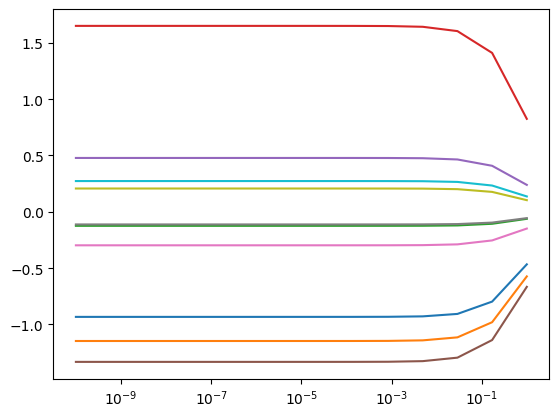

In [63]:
plt.plot(alphas, [ridge_solve(A, b, alpha) for alpha in alphas])
plt.xscale("log")
plt.show()

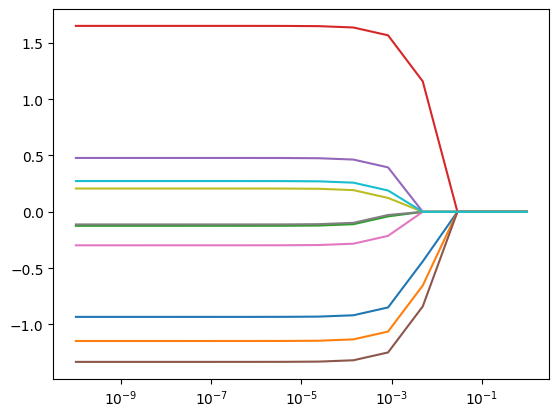

In [64]:
plt.plot(alphas, [lasso_solve(A, b, alpha) for alpha in alphas])
plt.xscale("log")
plt.show()

In [65]:
print(A, b, x)

[[-5.93921567e-02  2.03994567e-03  6.02885122e-02  1.36459149e-01
   1.46591537e-01  2.80880796e-02  1.23498012e-01 -1.85136790e-02
  -1.31491224e-01 -1.37981686e-01]
 [-4.86992075e-02 -2.42067613e-01  6.67302907e-02  1.68332447e-01
  -8.33124387e-02 -1.78549829e-02  1.78509061e-02 -3.57367771e-02
   1.39095725e-01  2.43375786e-02]
 [-1.65360293e-01 -1.23520536e-01 -1.12630492e-01 -4.69960604e-02
   6.54578724e-02  3.69419547e-02  5.64919666e-02 -5.45934309e-02
  -1.57018914e-01 -7.65655397e-02]
 [ 2.63462577e-03  1.34591256e-02 -3.63188829e-02  1.79640470e-01
  -1.49727821e-01  4.44618785e-02 -7.21449717e-02 -1.13454926e-01
   7.29246778e-02  2.01891794e-01]
 [-8.90595165e-02  2.65756851e-02  6.97819304e-02  3.93637439e-02
  -3.36758145e-02 -4.22240844e-02 -8.37135553e-03  1.40442159e-02
   1.03981058e-01  8.80660482e-02]
 [-2.25958830e-02 -6.09158322e-02 -4.68191464e-02  5.30916419e-03
  -1.56968551e-01  1.94885728e-01  8.42743758e-02  9.65185004e-02
   5.53099668e-02  4.23202338e-02